In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [3]:
task = ["Mechanical Design", "3D Prints", "Thruster System", "Electronics", "Payload", "Control Systems",
        "Prop Construction", "Float Assembly", "Documentation", "Final Assembly", "Testing & Calibration"]

start_date = ["2023-9-1", "2023-9-1", "2024-1-1", "2023-9-1", "2023-10-1", "2024-3-1",
              "2024-1-1", "2023-9-1", "2024-2-1", "2024-3-1", "2024-4-1"]
end_date = ["2024-6-15", "2023-12-30", "2024-5-30", "2024-2-28", "2024-3-30", "2024-5-30",
            "2024-4-30", "2024-3-30", "2024-5-30", "2024-4-30", "2024-6-15"]

df = pd.DataFrame(data={"Task": task, "Start": start_date, "End": end_date})

df["Start"] = pd.to_datetime(df.Start)
df["End"] = pd.to_datetime(df.End)

df["Days"] = df["End"] - df["Start"]

num_colors = len(df)
colors = plt.cm.tab20.colors[:num_colors]
df["Color"] = colors

df

,Task,Start,End,Days,Color
0,Mechanical Design,2023-09-01,2024-06-15,288 days,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,3D Prints,2023-09-01,2023-12-30,120 days,"(0.6823529411764706, 0.7803921568627451, 0.909..."
2,Thruster System,2024-01-01,2024-05-30,150 days,"(1.0, 0.4980392156862745, 0.054901960784313725)"
3,Electronics,2023-09-01,2024-02-28,180 days,"(1.0, 0.7333333333333333, 0.47058823529411764)"
4,Payload,2023-10-01,2024-03-30,181 days,"(0.17254901960784313, 0.6274509803921569, 0.17..."
5,Control Systems,2024-03-01,2024-05-30,90 days,"(0.596078431372549, 0.8745098039215686, 0.5411..."
6,Prop Construction,2024-01-01,2024-04-30,120 days,"(0.8392156862745098, 0.15294117647058825, 0.15..."
7,Float Assembly,2023-09-01,2024-03-30,211 days,"(1.0, 0.596078431372549, 0.5882352941176471)"
8,Documentation,2024-02-01,2024-05-30,119 days,"(0.5803921568627451, 0.403921568627451, 0.7411..."
9,Final Assembly,2024-03-01,2024-04-30,60 days,"(0.7725490196078432, 0.6901960784313725, 0.835..."


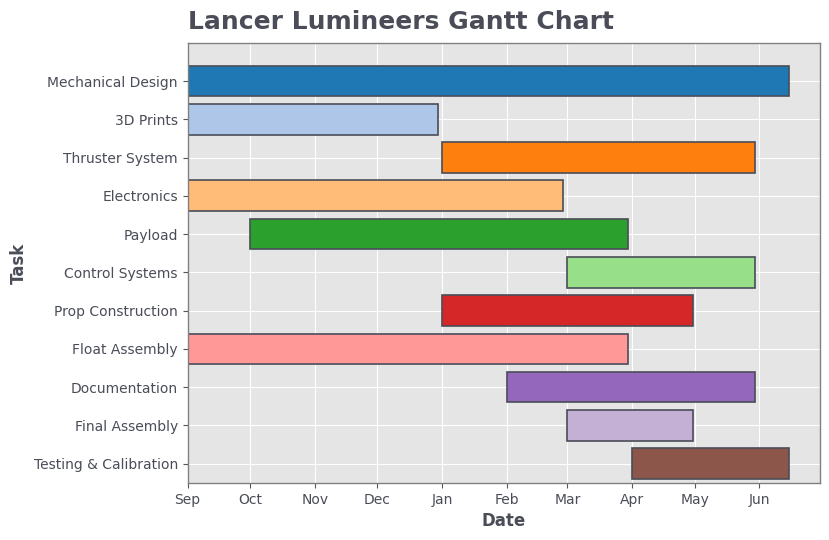

In [9]:
plt.style.use("ggplot");

fig = plt.figure(figsize=(9.3,5.5))

bars = plt.barh(y=df["Task"][::-1], left=df["Start"][::-1], width=df["Days"][::-1], color=df["Color"][::-1])
plt.xlim(date(2023,9,1), date(2024,6,30));
plt.ylim(-0.5, 11);

dt_rng = pd.date_range(start="2023-9-1", end="2024-6-30", freq="MS")


# Configuring font appearance
new_font = {'fontname': 'Helvetica'}

month_names_short = [dt.strftime('%b') for dt in dt_rng]
plt.xticks(dt_rng, month_names_short, fontsize=10, color='#4A4D58', **new_font)
plt.yticks(fontsize=10, color='#4A4D58', **new_font);

# Add border around the chart
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('gray')
    spine.set_linewidth(1)

# Set the background color
fig.patch.set_facecolor('white')  # Dark background color

# Change the bars to have a 3D effect
for bar in bars:
    bar.set_edgecolor('#4A4D58')  # Add edge color for the 3D effect
    bar.set_linewidth(1.2)  # Increase edge width for stronger 3D effect

plt.xlabel("Date", fontsize=12, fontweight="bold", **new_font, color="#4A4D58");
plt.ylabel("Task", fontsize=12, fontweight="bold", **new_font, color="#4A4D58");
plt.title("Lancer Lumineers Gantt Chart", loc="left", pad=10, fontsize=18, **new_font, fontweight="bold", color="#4A4D58");

# Adjust the margin size using subplots_adjust
plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.1)

plt.show()